In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from models.topaz.v5 import Model

In [ ]:
topaz = Model()

In [ ]:
path = '/cluster/work/users/yingyue/TP5_test/cycle/202109060000/topaz.v5'

grid = topaz.grid

time = datetime(2021,9,6)

##read ocean current and surface temp fields from restart
current = topaz.read_var(path=path, name='ocean_velocity', time=time, member=0)
sst  = topaz.read_var(path=path, name='ocean_temp', k=1, time=time, member=0)

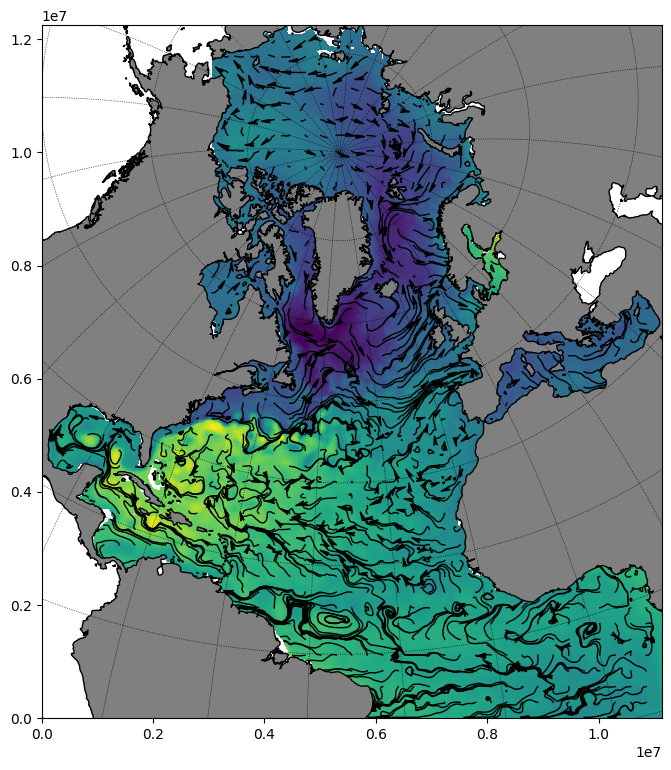

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,9))

grid.plot_field(ax, sst)
grid.plot_vectors(ax, current, V=0.1, num_steps=50)
grid.plot_land(ax, color='gray', dlat=15, dlon=15)

In [22]:
##make another smaller grid for the arctic region
import pyproj
from grid import Grid
grid1 = Grid.regular_grid(pyproj.Proj('+proj=stere +lon_0=0 +lat_0=90'), -3.5e6, 2.5e6, -3.5e6, 2.5e6, dx=1e4)

In [ ]:
##convert from grid to grid1
grid.dst_grid = grid1
current_ = grid.convert(current, is_vector=True)
sst_ = grid.convert(sst)

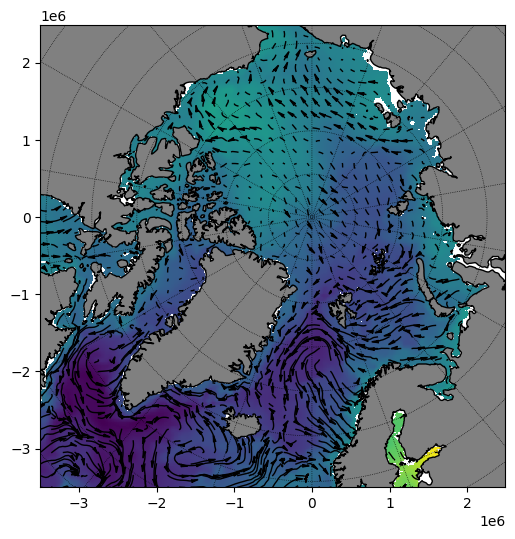

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
grid1.plot_field(ax, sst_)
grid1.plot_vectors(ax, current_)
grid1.plot_land(ax, color='gray')